In [ ]:
# Business Problem: 

In [ ]:
!gdown "1tCyKy4p93gntCP6TtTDx4RPXrzjJvWZQ"
!gdown "19dY4DTCf1PjsCVRGJdWIk2S0ohBNHKlN"
!gdown "1-xsSNizet0ruiMgKLWRcmme8L_iDejhc"

Downloading...
From: https://drive.google.com/uc?id=1tCyKy4p93gntCP6TtTDx4RPXrzjJvWZQ
To: /content/zee-movies.dat
100% 171k/171k [00:00<00:00, 57.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=19dY4DTCf1PjsCVRGJdWIk2S0ohBNHKlN
To: /content/zee-ratings.dat
100% 24.6M/24.6M [00:00<00:00, 131MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1-xsSNizet0ruiMgKLWRcmme8L_iDejhc
To: /content/zee-users.dat
100% 134k/134k [00:00<00:00, 81.4MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import re

pd.set_option('display.max_columns', None)



In [ ]:
movies = pd.read_fwf('zee-movies.dat',encoding = 'ISO-8859-1')
ratings = pd.read_fwf('zee-ratings.dat',encoding = 'ISO-8859-1')
users = pd.read_fwf('zee-users.dat',encoding = 'ISO-8859-1')

In [ ]:
movies.head(3)

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN


In [ ]:
movies = movies['Movie ID::Title::Genres'].str.split('::',expand=True)
movies.columns = ['movie_id','title','geners']

movies['release_year'] = movies['title'].apply(lambda x : re.findall('\([0-9]*\)',str(x)))
movies['release_year'] = movies['release_year'].apply(lambda x : re.sub('[^0-9]',"",str(x)))

display(movies[movies['release_year'].apply(lambda x : len(str(x)) >4)])

movies['release_year'] = pd.to_numeric(movies['release_year'],downcast='integer',errors='ignore')
movies['movie_id'] = movies['movie_id'].astype('int32',errors='ignore')

movies_default = movies.copy()

,movie_id,title,geners,release_year


In [ ]:
display(movies.head())
display(movies.describe())
display(movies.info())

,movie_id,title,geners,release_year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


,movie_id,release_year
count,3883.000000,3864.00000
mean,1986.049446,1986.09058
std,1146.778349,16.88945
min,1.000000,1919.00000
25%,982.500000,1982.00000
50%,2010.000000,1994.00000
75%,2980.500000,1997.00000
max,3952.000000,2000.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      3883 non-null   int32  
 1   title         3883 non-null   object 
 2   geners        3858 non-null   object 
 3   release_year  3864 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 106.3+ KB


None

In [ ]:
movies.dropna(axis=0,how='any',inplace=True)

In [ ]:
display(ratings.head())

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [ ]:
users = users["UserID::Gender::Age::Occupation::Zip-code"].str.split('::',expand=True)
users.columns = ['user_id','gender','age', 'occupation','zip_code']

users['user_id'] = users['user_id'].astype('int32',errors='ignore')
users['age'] = users['age'].astype('int32',errors = 'ignore')
users['occupation'] = users['occupation'].astype('int32',errors = 'ignore')

In [ ]:
users['age'].replace({
                        1: "Under 18",

                        18: "18-24",

                        25: "25-34",

                        35: "35-44",

                        45: "45-49",

                        50: "50-55",

                        56: "56+"},inplace=True)

users['occupation'].replace(
                    {
                        0: "other or not specified",

                        1: "academic/educator",

                        2: "artist",

                        3: "clerical/admin",

                        4: "college/grad student",

                        5: "customer service",

                        6: "doctor/health care",

                        7: "executive/managerial",

                        8: "farmer",

                        9: "homemaker",

                        10: "K-12 student",

                        11: "lawyer",

                        12: "programmer",

                        13: "retired",

                        14: "sales/marketing",

                        15: "scientist",

                        16: "self-employed",

                        17: "technician/engineer",

                        18: "tradesman/craftsman",

                        19: "unemployed",

                        20: "writer"
                    },inplace=True)

In [ ]:
display(users.head())
print("\n Users table summary\n")
display(users.describe())
print("\n User table dtype\n")
display(users.info())

,user_id,gender,age,occupation,zip_code
0,1,F,Under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455



 Users table summary



,user_id
count,6040.000000
mean,3020.500000
std,1743.742145
min,1.000000
25%,1510.750000
50%,3020.500000
75%,4530.250000
max,6040.000000



 User table dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int32 
 1   gender      6040 non-null   object
 2   age         6040 non-null   object
 3   occupation  6040 non-null   object
 4   zip_code    6040 non-null   object
dtypes: int32(1), object(4)
memory usage: 212.5+ KB


None

In [ ]:
users[users['age'] == 18]

NameError: ignored

In [ ]:
display(ratings.head())

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [ ]:
ratings = ratings["UserID::MovieID::Rating::Timestamp"].str.split('::',expand=True)
ratings.columns = ['user_id','movie_id','rating','timestamp']

ratings['user_id'] = ratings['user_id'].astype('int32',errors='ignore')
ratings['rating'] = ratings['rating'].astype('int32',errors = 'ignore')
ratings['movie_id'] = ratings['movie_id'].astype('int32',errors='ignore')

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s').dt.hour
ratings.columns = ['user_id','movie_id','rating','hour']
ratings['avg_ratings'] = ratings.groupby('user_id')['rating'].transform('mean').round(2)

In [ ]:
display(ratings.head())
display(ratings.describe())
display(ratings.info())

,user_id,movie_id,rating,hour,avg_ratings
0,1,1193,5,22,4.19
1,1,661,3,22,4.19
2,1,914,3,22,4.19
3,1,3408,4,22,4.19
4,1,2355,5,23,4.19


,user_id,movie_id,rating,hour,avg_ratings
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,1.191620e+01,3.581581e+00
std,1.728413e+03,1.096041e+03,1.117102e+00,7.894465e+00,4.360299e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.020000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00,4.000000e+00,3.320000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00,1.400000e+01,3.610000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00,1.900000e+01,3.880000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00,2.300000e+01,4.960000e+00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   user_id      1000209 non-null  int32  
 1   movie_id     1000209 non-null  int32  
 2   rating       1000209 non-null  int32  
 3   hour         1000209 non-null  int64  
 4   avg_ratings  1000209 non-null  float64
dtypes: float64(1), int32(3), int64(1)
memory usage: 26.7 MB


None

In [ ]:
display(users.head())
display(ratings.head())
display(movies.head())

,user_id,gender,age,occupation,zip_code
0,1,F,Under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455


,user_id,movie_id,rating,hour,avg_ratings
0,1,1193,5,22,4.19
1,1,661,3,22,4.19
2,1,914,3,22,4.19
3,1,3408,4,22,4.19
4,1,2355,5,23,4.19


,movie_id,title,geners,release_year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


In [ ]:
geners = movies.copy()
geners['geners'] = geners['geners'].str.split('|')
geners = geners.explode('geners')
a = ~geners.pivot(index='movie_id',columns = 'geners',values = 'title').isna()
a = a.astype(int)
display(a.head(3))

geners,,A,Acti,Action,Adv,Advent,Adventu,Adventur,Adventure,Animati,Animation,Chi,Chil,Childr,Childre,Children,Children',Children's,Com,Come,Comed,Comedy,Crime,D,Docu,Documen,Document,Documenta,Documentary,Dr,Dram,Drama,F,Fant,Fantas,Fantasy,Film-Noir,Horr,Horro,Horror,Music,Musical,Mystery,R,Ro,Rom,Roma,Roman,Romance,S,Sci,Sci-,Sci-F,Sci-Fi,Th,Thri,Thrille,Thriller,Wa,War,We,Wester,Western
movie_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dic = {'a':'action', 'acti':'action','adv':'adventure', 'advent':'adventure', 'adventu':'adventure', 'adventur':'adventure',
       'animati':'animation', 'chi':'children','chil':'children', 'childr':'children', 'childre':'children',
       'children':'children',"children's":'children', 'com':'comedy', 'come':'comedy', 'comed':'comedy',
       'd':'documentary', 'docu':'documentary', 'documen':'documentary', 'document':'documentary', 'documenta':'documentary',
       'dr':'drama', 'dram':'drama', 'f':'fantasy', 'fant':'fantasy', 'fantas':'fantasy', 
       'horr':'horror', 'horro':'horror', 'music':'musical', 'r':'romance', 'ro':'romance',
       'rom':'romance', 'roma':'romance', 'roman':'romance', 's':'sci-fi', 'sci':'sci-fi', 'sci-':'sci-fi', 'sci-f':'sci-fi',
       'th':'thriller', 'thri':'thriller', 'thrille':'thriller', 'wa':'western', 'war':'western', 'we':'western',
       'wester':'western',"children'":'children' }



In [ ]:
movies['geners'] = movies['geners'].apply(lambda x : str(x).lower())
movies['geners'] = movies['geners'].replace(dic)
display(movies.head(3))

temp = movies.copy()
temp['geners'] = temp['geners'].str.split('|')
temp = temp.explode('geners')
temp['geners'].replace(dic,inplace=True)
movies = temp
movies = movies[~movies.duplicated()]
print(f" {'*' * 50} {'Movies DataFrame'} {'*' * 50}")
display(movies.head(3))

,movie_id,title,geners,release_year
0,1,Toy Story (1995),animation|children's|comedy,1995.0
1,2,Jumanji (1995),adventure|children's|fantasy,1995.0
2,3,Grumpier Old Men (1995),comedy|romance,1995.0


 ************************************************** Movies DataFrame **************************************************


,movie_id,title,geners,release_year
0,1,Toy Story (1995),animation,1995.0
0,1,Toy Story (1995),children,1995.0
0,1,Toy Story (1995),comedy,1995.0


In [ ]:
user_ratings = pd.merge(users, ratings, left_on = 'user_id', right_on = 'user_id', how = 'inner')

user_movie_ratings = user_ratings.merge(movies, on = 'movie_id')
user_movie_ratings = user_movie_ratings[~user_movie_ratings.duplicated()]
display(user_movie_ratings[user_movie_ratings.duplicated()])

user_item = user_movie_ratings[~user_movie_ratings[['user_id','movie_id','rating']].duplicated()]
user_item = user_item.pivot(index = 'user_id', columns = 'movie_id', values = 'rating')
user_item.fillna(0,inplace=True)
user_item_movies = users.merge(user_item.reset_index(), on = "user_id")

,user_id,gender,age,occupation,zip_code,movie_id,rating,hour,avg_ratings,title,geners,release_year


In [ ]:
m = movies.pivot(index = 'movie_id',columns = 'geners',values = 'movie_id')
m = (~m.isna()).astype(int)

user_item_geners = movies[['movie_id','release_year']].merge(users.merge(ratings.merge(m.reset_index(), on = 'movie_id'), on = 'user_id'), on = 'movie_id')
user_item_geners.rename(columns = {'':'other'},inplace=True)

In [ ]:
def kde_boxplot(data, x, font_size, target=None):
    plt.figure(figsize = (20,7))
    
    plt.subplot(1,2,1)
    sns.kdeplot(data = data,
                x = x,
                hue = target
               )
    if target != None:
        plt.title(label = "Distribution of "+x+" for different "+target,
                 y = -0.2,
                 fontsize = font_size,
                 fontweight = 'bold')
    else:
        plt.title(label = "Distribution of "+x, 
                 y = -0.2,
                 fontsize = font_size,
                 fontweight = 'bold')
    plt.grid()
    
    plt.subplot(1,2,2)
    sns.boxplot(data=data,
               x = target,
               y = x)

    if target != None:
        plt.title(label = "Boxplot showing distribution of "+x+" for different "+target,
                 y = -0.2,
                 fontsize = font_size,
                 fontweight = 'bold')
        if df_grouped['City'].nunique() > 5:
            plt.xticks(rotation = 75)
    else:
        plt.title(label = "Boxplot showing distribution of "+x,
                 y = -0.2,
                 fontsize = font_size,
                 fontweight = 'bold')
    plt.grid(which='both')
    plt.show()

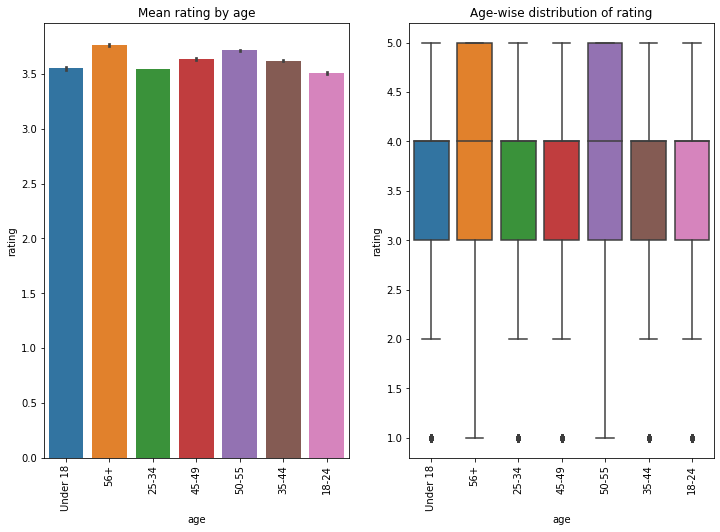

In [ ]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
sns.barplot(data=user_ratings, x = 'age', y = 'rating',estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Mean rating by age')

plt.subplot(1,2,2)
sns.boxplot(data=user_ratings, x = 'age',  y= 'rating')
plt.xticks(rotation=90)
plt.title('Age-wise distribution of rating')

plt.show()

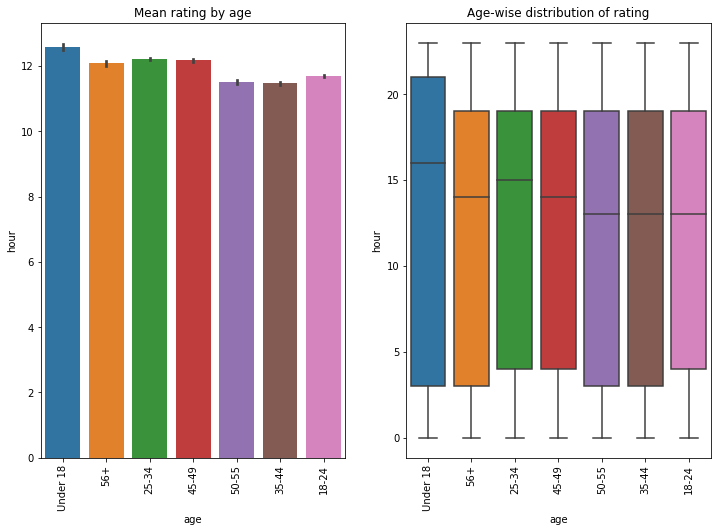

In [ ]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
sns.barplot(data=user_ratings, x = 'age', y = 'hour',estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Mean rating by age')

plt.subplot(1,2,2)
sns.boxplot(data=user_ratings, x = 'age',  y= 'hour')
plt.xticks(rotation=90)
plt.title('Age-wise distribution of rating')

plt.show()

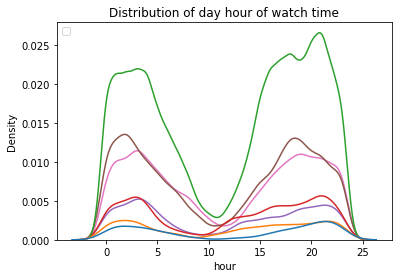

In [ ]:
sns.kdeplot(data=user_ratings, x = 'hour',hue='age',legend=True)
plt.title('Distribution of day hour of watch time')
plt.legend(loc= 'upper left')
plt.show()

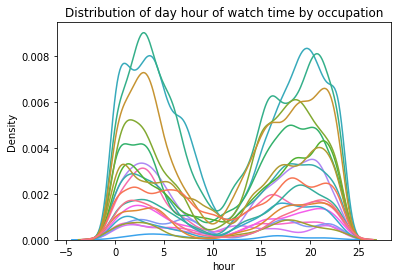

In [ ]:
sns.kdeplot(data=user_ratings, x = 'hour',hue='occupation',legend=False)
plt.title('Distribution of day hour of watch time by occupation')
plt.show()

---

In [ ]:
geners = movies.copy()
geners = ~geners.pivot(index='movie_id',columns = 'geners',values = 'movie_id').isna()
geners = geners.astype(int)
print(f" {'*' * 50} {'Geners DataFrame'} {'*' * 50}")
display(geners.head(3))


 ************************************************** Geners DataFrame **************************************************


geners,,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,western
movie_id,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


---
## Recommendations using Pearson Correlation

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


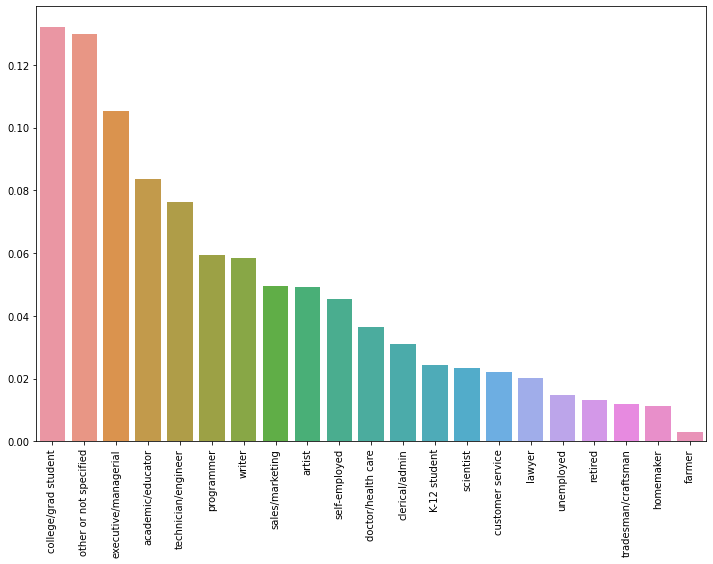

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(user_item_geners['occupation'].value_counts().index,user_item_geners['occupation'].value_counts(normalize=True).values )
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


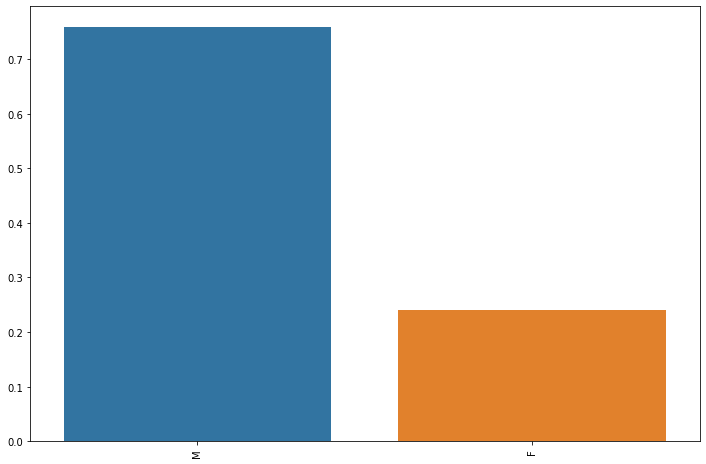

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(user_item_geners['gender'].value_counts().index,user_item_geners['gender'].value_counts(normalize=True).values )
plt.xticks(rotation = 90)
plt.show()

In [ ]:
occup = {
 'college/grad student':2 ,
 'other or not specified':2,
 'executive/managerial':2, 
 'academic/educator':2, 
 'technician/engineer':2,
 'programmer':1, 
 'writer':1, 
 'sales/marketing':1, 
 'artist':1, 
 'self-employed':1,
 'doctor/health care':1, 
 'clerical/admin':1, 
 'K-12 student':1, 
 'scientist':0,
 'customer service':0, 
 'lawyer':0, 
 'unemployed':0, 
 'retired':0,
 'tradesman/craftsman':0, 
 'homemaker':0, 
 'farmer':0}

age = {
     "Under 18":18,    
     "18-24":24,
     "25-34":34,
     "35-44":44,
     "45-49":49,
     "50-55":55,
     "56+":56 
     }

In [ ]:
user_item_geners['occupation'] = user_item_geners['occupation'].map(occup)
user_item_geners['gender'] = user_item_geners['gender'].map({'M':1, 'F':0})
user_item_geners['age'] = user_item_geners['age'].map(age)

user_item_movies['occupation'] = user_item_movies['occupation'].map(occup)
user_item_movies['gender'] = user_item_movies['gender'].map({'M':1, 'F':0})
user_item_movies['age'] = user_item_movies['age'].map(age)

In [ ]:
user_item_movies.drop('zip_code',axis=1,inplace=True)
user_item_geners.drop('zip_code',axis=1,inplace=True)

In [ ]:
user_item_geners.rename(columns = {'user_id' : 'UserId', 'movie_id':'ItemId', 'rating': 'Rating'},inplace=True)
user_item_movies.rename(columns = {'user_id' : 'UserId'},inplace=True)

In [ ]:
user_item_geners = user_item_geners[['ItemId', 'UserId','release_year', 'gender', 'age', 'occupation',
       'Rating', 'hour', 'avg_ratings', 'other', 'action', 'adventure',
       'animation', 'children', 'comedy', 'crime', 'documentary', 'drama',
       'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance',
       'sci-fi', 'thriller', 'western']]

In [ ]:
display(user_item_geners.head(3))
display(user_item_movies.head(3))

,ItemId,UserId,release_year,gender,age,occupation,Rating,hour,avg_ratings,other,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,western
0,1,1,1995.0,0,18,1,5,23,4.19,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,6,1995.0,0,55,0,4,4,3.90,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,8,1995.0,1,34,1,4,3,3.88,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0


UserId  gender  age  occupation    1    2    3    4    5    6    7    8  \
0       1       0   18           1  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       2       1   56           1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       3       1   34           0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     9   10   11   12   13   14   15   16   17   18   19   20   21   22   23  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    24   25   26   27   28   29   30   31   32   33   34   35   36   37   38  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    39   40   41   42   43   44   45   46   47   48   49   50   52   53   54  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    55   56   57   58   59   60   61   62   64   65   66   67   68   69   70  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    71   72   73   74   75   76   77   78   79   80   81   82   83   84   85  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    86   87   88   89   90   92   93   94   95   96   97   98   99  100  101  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   102  103  104  105  106  107  108  110  111  112  113  114  116  117  118  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   134  135  136  137  138  139  140  141  142  144  145  146  147  148  149  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  \
0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   180  181  182  183  184  185  186  187  188  189  190  191  192  193  194  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

In [ ]:
## Standardization 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss1 = StandardScaler()
ss2 = StandardScaler()

user_item_movies.loc[:,'gender':] = ss1.fit_transform(user_item_movies.loc[:,'gender':])
user_item_geners.loc[:,'release_year': ] = ss2.fit_transform(user_item_geners.loc[:,'release_year':]) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


---
## Recommendation using Pearson Correlation

In [ ]:
def pearson_rec(data,k,movie_id):
    temp = data.T.corr()
    mov = temp.loc[:, movie_id].sort_values(ascending=False)[:k].index
    display(movies_default.loc[movies_default.movie_id.isin(mov)].reset_index(drop=True))

In [ ]:
pearson_rec(geners, 10, 6)

,movie_id,title,geners,release_year
0,6,Heat (1995),Action|Crime|Thriller,1995.0
1,170,Hackers (1995),Action|Crime|Thriller,1995.0
2,464,Hard Target (1993),Action|Adventure|Crime|Thriller,1993.0
3,1953,"French Connection, The (1971)",Action|Crime|Drama|Thriller,1971.0
4,2126,Snake Eyes (1998),Action|Crime|Mystery|Thriller,1998.0
5,2278,Ronin (1998),Action|Crime|Thriller,1998.0
6,2540,"Corruptor, The (1999)",Action|Crime|Drama|Thriller,1999.0
7,2956,Someone to Watch Over Me (1987),Action|Crime|Thriller,1987.0
8,3763,F/X (1986),Action|Crime|Thriller,1986.0
9,3764,F/X 2 (1992),Action|Crime|Thriller,1992.0


---
## Recommendations using Cosine similarity

In [ ]:
def cosine_recommendations(geners, k, entitiy):
    cos = metrics.pairwise.cosine_similarity(geners)
    cos = pd.DataFrame(data=cos, columns = geners.index, index = geners.index)
    rec = (cos.loc[3].sort_values(ascending=False)).index[:k]
    rec = movies_default[movies_default.movie_id.isin(rec)][['title','movie_id','geners']]
    display(rec[['movie_id','title','geners']].reset_index(drop=True))
        

In [ ]:
cosine_recommendations(geners,10,5)

,movie_id,title,geners
0,276,Milk Money (1994),Comedy|Romance
1,287,Nina Takes a Lover (1994),Comedy|Romance
2,289,Only You (1994),Comedy|Romance
3,294,"Perez Family, The (1995)",Comedy|Romance
4,295,"Pyromaniac's Love Story, A (1995)",Comedy|Romance
5,752,Vermont Is For Lovers (1992),Comedy|Romance
6,1541,Addicted to Love (1997),Comedy|Romance
7,1854,Kissing a Fool (1998),Comedy|Romance
8,2339,I'll Be Home For Christmas (1998),Comedy|Romance
9,3501,Murphy's Romance (1985),Comedy|Romance


----
## Recommendation using Nearest Neighbour

In [ ]:
user_item_movies

UserId    gender       age  occupation         1         2         3  \
0          1 -1.591927 -1.842140   -0.563803  1.758734 -0.344462 -0.274956   
1          2  0.628170  1.651736   -0.563803 -0.701718 -0.344462 -0.274956   
2          3  0.628170 -0.371034   -1.982117 -0.701718 -0.344462 -0.274956   
3          4  0.628170  1.008128    0.854511 -0.701718 -0.344462 -0.274956   
4          5  0.628170 -0.371034   -0.563803 -0.701718 -0.344462 -0.274956   
...      ...       ...       ...         ...       ...       ...       ...   
6035    6036 -1.591927 -0.371034   -1.982117 -0.701718 -0.344462 -0.274956   
6036    6037 -1.591927  1.008128    0.854511 -0.701718 -0.344462 -0.274956   
6037    6038 -1.591927  1.651736    0.854511 -0.701718 -0.344462 -0.274956   
6038    6039 -1.591927  1.008128    0.854511 -0.701718 -0.344462 -0.274956   
6039    6040  0.628170 -0.371034   -0.563803  0.774553 -0.344462 -0.274956   

             4         5         6         7         8         9        10  \
0    -0.159317 -0.214328 -0.415292 -0.274471 -0.101751 -0.121857 -0.400567   
1    -0.159317 -0.214328 -0.415292 -0.274471 -0.101751 -0.121857 -0.400567   
2    -0.159317 -0.214328 -0.415292 -0.274471 -0.101751 -0.121857 -0.400567   
3    -0.159317 -0.214328 -0.415292 -0.274471 -0.101751 -0.121857 -0.400567   
4    -0.159317 -0.214328  0.960662 -0.274471 -0.101751 -0.121857 -0.400567   
...        ...       ...       ...       ...       ...       ...       ...   
6035  3.988409 -0.214328  1.648640 -0.274471 -0.101751 -0.121857 -0.400567   
6036 -0.159317 -0.214328 -0.415292 -0.274471 -0.101751 -0.121857 -0.400567   
6037 -0.159317 -0.214328 -0.415292 -0.274471 -0.101751 -0.121857 -0.400567   
6038 -0.159317 -0.214328 -0.415292 -0.274471 -0.101751 -0.121857 -0.400567   
6039 -0.159317 -0.214328 -0.415292 -0.274471 -0.101751 -0.121857 -0.400567   

            11        12        13        14        15        16        17  \
0    -0.440640 -0.146625 -0.122784 -0.156438 -0.140713 -0.345862 -0.389310   
1    -0.440640 -0.146625 -0.122784 -0.156438 -0.140713 -0.345862 -0.389310   
2    -0.440640 -0.146625 -0.122784 -0.156438 -0.140713 -0.345862 -0.389310   
3    -0.440640 -0.146625 -0.122784 -0.156438 -0.140713 -0.345862 -0.389310   
4    -0.440640 -0.146625 -0.122784 -0.156438 -0.140713  2.076644 -0.389310   
...        ...       ...       ...       ...       ...       ...       ...   
6035  1.596717 -0.146625 -0.122784 -0.156438 -0.140713  2.076644  2.407516   
6036 -0.440640 -0.146625 -0.122784 -0.156438 -0.140713 -0.345862  2.407516   
6037 -0.440640 -0.146625 -0.122784 -0.156438 -0.140713 -0.345862 -0.389310   
6038 -0.440640 -0.146625 -0.122784 -0.156438 -0.140713 -0.345862 -0.389310   
6039 -0.440640 -0.146625 -0.122784 -0.156438 -0.140713 -0.345862  1.708310   

            18        19       20        21        22        23        24  \
0    -0.156145 -0.235547 -0.15522 -0.516365 -0.247422 -0.137644 -0.319948   
1    -0.156145 -0.235547 -0.15522  0.118320 -0.247422 -0.137644 -0.319948   
2    -0.156145 -0.235547 -0.15522 -0.516365 -0.247422 -0.137644 -0.319948   
3    -0.156145 -0.235547 -0.15522 -0.516365 -0.247422 -0.137644 -0.319948   
4    -0.156145 -0.235547 -0.15522 -0.516365 -0.247422 -0.137644  0.654088   
...        ...       ...      ...       ...       ...       ...       ...   
6035 -0.156145 -0.235547 -0.15522  1.387691 -0.247422 -0.137644  1.628123   
6036 -0.156145 -0.235547 -0.15522 -0.516365 -0.247422 -0.137644 -0.319948   
6037 -0.156145 -0.235547 -0.15522 -0.516365 -0.247422 -0.137644 -0.319948   
6038 -0.156145 -0.235547 -0.15522 -0.516365 -0.247422 -0.137644 -0.319948   
6039 -0.156145 -0.235547 -0.15522 -0.516365 -0.247422 -0.137644 -0.319948   

            25        26        27        28        29        30        31  \
0    -0.418283 -0.125285 -0.095826 -0.170759 -0.259169 -0.107320 -0.147575   
1    -0.418283 -0.125285 -0.095826 -0.170759 -0.259169 -0.107320 -0.147575   
2    -0.418283 -0.125285 -0.095826 -

In [ ]:
def euclidian_distance(a,b):
  return (np.sum((a-b)**2,axis=1))**0.5

def NN_rec(user_id, num_mov):
  dist = euclidian_distance(user_item_movies.iloc[user_id - 1,1:], user_item_movies.iloc[:,1:])
  u = dist.sort_values()[1:5].index
  u_mov = ratings[ratings.user_id == user_id]['movie_id']
  rec_mov_id = (ratings[(ratings['user_id'].isin(u)) & (~ratings['movie_id'].isin(u_mov))].sort_values(by='rating',ascending=False))['movie_id'].values[:num_mov]
  display(movies_default[movies_default.movie_id.isin(rec_mov_id)])

In [ ]:
NN_rec(4,5)

,movie_id,title,geners,release_year
1116,1132,Manon of the Spring (Manon des sources) (1986),Drama,1986.0
1135,1151,Faust (1994),Animation|Comedy|Thriller,1994.0
1197,1215,Army of Darkness (1993),Action|Adventure|Comedy|Horror|Sci-Fi,1993.0
1491,1527,"Fifth Element, The (1997)",Action|Sci-Fi,1997.0
2928,2997,Being John Malkovich (1999),Comedy,1999.0


In [ ]:
euclidian_distance(user_item_movies.iloc[1-1,1:], user_item_movies.iloc[:,1:])

0         0.000000
1        47.015209
2        33.735913
3        28.547329
4        73.618567
           ...    
6035    155.132388
6036     57.063250
6037     30.873789
6038     48.592913
6039     93.128151
Length: 6040, dtype: float64

,user_id,gender,age,occupation,zip_code
0,1,F,Under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455
...,...,...,...,...,...
6035,6036,F,25-34,scientist,32603
6036,6037,F,45-49,academic/educator,76006
6037,6038,F,56+,academic/educator,14706
6038,6039,F,45-49,other or not specified,01060


In [ ]:
dist.sort_values

<bound method Series.sort_values of 0        44.196071
1        54.613431
2        43.673703
3        40.489768
4        79.015524
           ...    
6035    158.273056
6036     63.785190
6037     41.253709
6038     56.581357
6039     97.240688
Length: 6040, dtype: float64>

In [ ]:
pip install cmfrec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.6/267.6 KB 18.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached findblas-0.1.20-py3-none-any.whl
  Created wheel for cmfrec: filename=cmfrec-3.5.0.post1-cp38-cp38-linux_x86_64.whl size=6068557 sha256=145e2204b6f5d3906dbbf54bf9ea4fe33ecdd6880f71dd64a07d9c7552a88b38
  Stored in directory: /root/.cache/pip/wheels/08/6b/25/1ebcd3aad4d02fb6f68d9b045cf9bb019d0d94c261eb8c6758
Successfully built cmfrec


In [ ]:
from cmfrec import CMF

In [ ]:
model = CMF(k=7, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model.fit(user_item_geners)

Collective matrix factorization model
(explicit-feedback variant)


In [ ]:
print(f"A has {model.A_.shape[0]} row and {model.A_.shape[1]} columns")
print(f"B has {model.B_.shape[0]} row and {model.B_.shape[1]} columns")

A has 6040 row and 7 columns
B has 3682 row and 7 columns


In [ ]:
top_items = model.topN(user=5, n=10)
movies_default.loc[movies_default.movie_id.isin(top_items)]

# Final Insights and Recommendations

## Insights 

1. Different recommendations can be used at different instance according to users state of website/application
  - In home page we can provide recommendations using collaborative matrix factorization.
  - If someone is browsing genres then we can use either cosine similarity or correlation similarity recommendations 
  - If the users is a frequent user then we can provide recommendations using Nearest Neighbour recommendations

2. There are either two time zones present or users do watch shows at night rather that day or evening time, using this a more concentrated recommenation system can be created.

3. 